# Analysis for Group Project

### A single dataset is used for all the crop prices 

this dataset displays a time series of prices for different Canadian agricultural products over time.

[Farm product prices, crops and livestock](https://open.canada.ca/data/en/dataset/d5614095-e77a-4cb4-a5e6-9f8bff067c9f)


In [1]:
import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm


# here is a util we'll use to plot graphs of prices
def _plot_time_series_from_df(df, x, y, z, product_name):
    sns.lineplot(data=df, x=x, y=y, hue=z)
    plt.title(f"Time Series of Prices for {product_name}")
    plt.xlabel("Date")
    plt.ylabel(df["UOM"].iloc[0])


In [2]:
# CSV was downloaded and added to the git repo
# Read in the prices CSV
prices_df = pd.read_csv("./data/32100077.csv")
prices_df.head()

,REF_DATE,GEO,DGUID,Farm products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1980-01,Manitoba,2016A000246,"Canadian Wheat Board, wheat including payments",Dollars per metric tonne,117,units,0,v31212166,7.4,170.49,NaN,NaN,t,2
1,1980-01,Manitoba,2016A000246,"Canadian Wheat Board, wheat excluding payments",Dollars per metric tonne,117,units,0,v31212167,7.5,133.74,NaN,NaN,t,2
2,1980-01,Manitoba,2016A000246,"Canadian Wheat Board, durum including payments",Dollars per metric tonne,117,units,0,v31212168,7.6,178.79,NaN,NaN,t,2
3,1980-01,Manitoba,2016A000246,"Canadian Wheat Board, durum excluding payments",Dollars per metric tonne,117,units,0,v31212169,7.7,142.90,NaN,NaN,t,2
4,1980-01,Saskatchewan,2016A000247,"Canadian Wheat Board, wheat including payments",Dollars per metric tonne,117,units,0,v31212202,8.4,175.79,NaN,NaN,t,2


In [3]:
# DATA PREP

# if you look at the DF, there is a date column in the format of YYYY-MM
## let's turn this into a proper datetime object 
prices_df["REF_DATE"] = pd.to_datetime(prices_df["REF_DATE"].apply(lambda x: dt.datetime.strptime(x, "%Y-%m")))
# let's also add an integer column for Year
## this column will be useful for grouping in our analysis
prices_df["YEAR"] = prices_df["REF_DATE"].apply(lambda x: x.year)
## convert UOM to category data type
prices_df["UOM"] = prices_df["UOM"].astype("category")
## convert SCALAR_FACTOR to category data type
prices_df["SCALAR_FACTOR"] = prices_df["SCALAR_FACTOR"].astype("category")
prices_df.head()


,REF_DATE,GEO,DGUID,Farm products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,YEAR
0,1980-01-01,Manitoba,2016A000246,"Canadian Wheat Board, wheat including payments",Dollars per metric tonne,117,units,0,v31212166,7.4,170.49,NaN,NaN,t,2,1980
1,1980-01-01,Manitoba,2016A000246,"Canadian Wheat Board, wheat excluding payments",Dollars per metric tonne,117,units,0,v31212167,7.5,133.74,NaN,NaN,t,2,1980
2,1980-01-01,Manitoba,2016A000246,"Canadian Wheat Board, durum including payments",Dollars per metric tonne,117,units,0,v31212168,7.6,178.79,NaN,NaN,t,2,1980
3,1980-01-01,Manitoba,2016A000246,"Canadian Wheat Board, durum excluding payments",Dollars per metric tonne,117,units,0,v31212169,7.7,142.90,NaN,NaN,t,2,1980
4,1980-01-01,Saskatchewan,2016A000247,"Canadian Wheat Board, wheat including payments",Dollars per metric tonne,117,units,0,v31212202,8.4,175.79,NaN,NaN,t,2,1980


In [4]:
# let's look at the shape of the data frames
print(prices_df.shape)

(109951, 16)


In [5]:
# Just so that we have a comprehensive list of the different products in this dataset, let's print out a unique lit of the `Farm products` column 

products = pd.Series(prices_df["Farm products"].sort_values().unique(), name="products")
products

0                                      Barley [1151141]
1                    Barley for animal feed [115114111]
2     Barley for malt and other human consumption [1...
3                         Calves for feeding [11111122]
4                      Calves for slaughter [111111211]
5       Canadian Wheat Board, barley excluding payments
6       Canadian Wheat Board, barley including payments
7        Canadian Wheat Board, durum excluding payments
8        Canadian Wheat Board, durum including payments
9     Canadian Wheat Board, selected barley excludin...
10    Canadian Wheat Board, selected barley includin...
11       Canadian Wheat Board, wheat excluding payments
12       Canadian Wheat Board, wheat including payments
13                              Canary seeds [11511555]
14                 Canola (including rapeseed) [113111]
15                        Cattle for feeding [11111112]
16                      Cattle for slaughter [11111111]
17                         Chickens for meat [11

# Part 2: Hogs


In [6]:
# Prices

# DATA PREP

# define a `products` variable that will be used to select the rows of interest
product = "Hogs [111121]"

# create a boolean mask that will select chickens for meat and rows where the `VALUE` column is not null 
mask = (prices_df["Farm products"] == product) & (prices_df["VALUE"].notnull())
hog_prices_df = prices_df[mask]
hog_prices_df.head()

,REF_DATE,GEO,DGUID,Farm products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,YEAR
1165,1985-01-01,Prince Edward Island,2016A000211,Hogs [111121],Dollars per hundredweight,108,units,0,v31212074,2.37,73.33,NaN,NaN,NaN,2,1985
1175,1985-01-01,Nova Scotia,2016A000212,Hogs [111121],Dollars per hundredweight,108,units,0,v31212092,3.37,72.98,NaN,NaN,NaN,2,1985
1186,1985-01-01,New Brunswick,2016A000213,Hogs [111121],Dollars per hundredweight,108,units,0,v31212111,4.37,73.31,NaN,NaN,NaN,2,1985
1198,1985-01-01,Quebec,2016A000224,Hogs [111121],Dollars per hundredweight,108,units,0,v31212135,5.37,72.18,NaN,NaN,NaN,2,1985
1214,1985-01-01,Ontario,2016A000235,Hogs [111121],Dollars per hundredweight,108,units,0,v31212161,6.37,73.99,NaN,NaN,NaN,2,1985


In [7]:
# we need to make sure we are only dealing with a single category for UoM and Scale
## sometimes these datasets will have the same data in a subsequent row for a different scale. e.g., `Dollars per kg` vs. `dollars per pound`.
assert hog_prices_df["Farm products"].unique().__len__() == 1
assert hog_prices_df["UOM"].unique().__len__() == 1
assert hog_prices_df["SCALAR_FACTOR"].unique().__len__() == 1

# if there is no exception raised, we are good to go!  

When we look at the historical prices, Newfoundland looks very different from the other provinces. It is clear that NL is distinct from the rest of the country which is comparatively in lock step. 

That being considered, it would make sense to exclude this province from our analysis.

Furthermore, in order to work with the data, it will be easier to have all the price data aggregated into a single response. 

The graphs below show the three states of the data:

1. The raw price data from all the provinces
2. The raw price data from all the provinces except for NL which was excluded
3. An aggregated price curve - the annual mean for all provinces, excluding NL


<Axes: title={'center': 'Aggregated Price of Hogs in Canada (1985-2023)'}, xlabel='Date', ylabel='Dollars per hundredweight'>

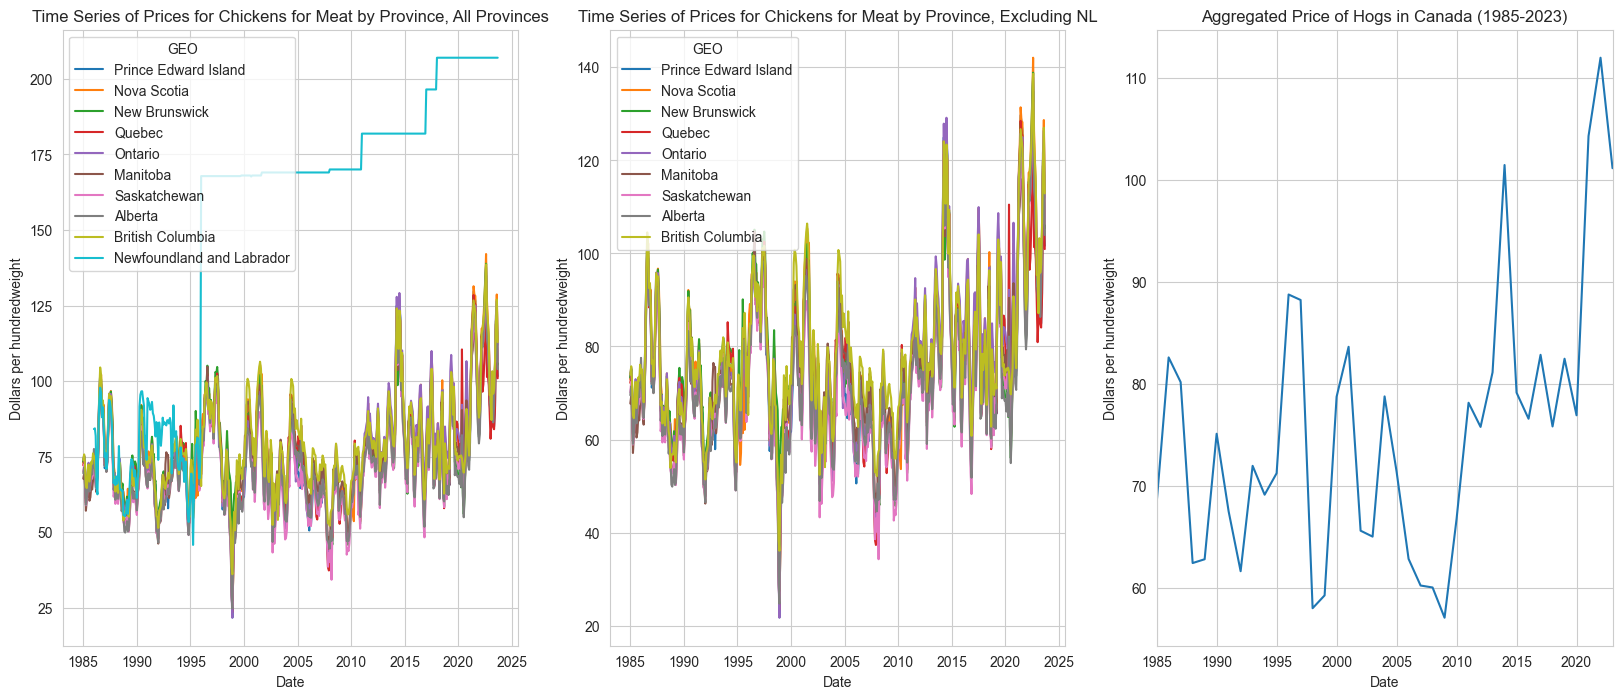

In [8]:
# define the fig size
plt.figure(figsize=(20, 8))

# plot with all provinces
plt.subplot(1, 3, 1)
_plot_time_series_from_df(hog_prices_df, "REF_DATE", "VALUE", "GEO", "Chickens for Meat by Province, All Provinces")

# plot with all provinces, excluding newfoundland
plt.subplot(1, 3, 2)
mask = (hog_prices_df["GEO"] != "Newfoundland and Labrador")
hog_prices_df = hog_prices_df[mask]
_plot_time_series_from_df(hog_prices_df, "REF_DATE", "VALUE", "GEO", "Chickens for Meat by Province, Excluding NL")

# plot with all provinces, combined into a single variable
plt.subplot(1, 3, 3)
hog_prices_df.groupby("YEAR")["VALUE"].mean()

# convert to time series - this will be used later on for the final analysis
ser_hog_prices = pd.Series(
    data=hog_prices_df.groupby("YEAR")["VALUE"].mean(numeric_only=True).values,
    index=hog_prices_df.groupby("YEAR").mean(numeric_only=True).index.to_series().apply(lambda x: dt.datetime.strptime(str(x), "%Y")),
    name="prices"
)
# Jeush, please take note of the transformation needed to create the index on the time series

# labels for plot
labels = {
    "title": f"Aggregated Price of Hogs in Canada ({ser_hog_prices.index.min().year}-{ser_hog_prices.index.max().year})",
    "xlabel": "Date",
    "ylabel": "Dollars per hundredweight",
}
ser_hog_prices.plot(**labels)



Now we need some production data. Let's use this dataset: 
[Hogs, sheep and lambs, farm and meat production](https://open.canada.ca/data/en/dataset/28a34385-92a2-4934-8899-2cc85fcc4786)

In [9]:

# from https://open.canada.ca/data/en/dataset/28a34385-92a2-4934-8899-2cc85fcc4786

# CSV was downloaded and added to the git repo
# This will be the response variable
production_df = pd.read_csv("./data/32100126.csv")

# let's take a look
print(production_df.shape)
production_df.head()


(1748, 16)


,REF_DATE,GEO,DGUID,Estimates,Livestock,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1920,Canada,2016A000011124,Estimated farm output,Hogs,Head,148,thousands,3,v61841,1.3.1,3302.6,NaN,NaN,NaN,1
1,1920,Canada,2016A000011124,Estimated farm output,Sheep and lambs,Head,148,thousands,3,v62137,1.3.2,1353.3,NaN,NaN,NaN,1
2,1920,Canada,2016A000011124,"Exported alive, farm production",Hogs,Head,148,thousands,3,v61842,1.4.1,1.4,NaN,NaN,NaN,1
3,1920,Canada,2016A000011124,"Exported alive, farm production",Sheep and lambs,Head,148,thousands,3,v62140,1.4.2,184.0,NaN,NaN,NaN,1
4,1920,Canada,2016A000011124,"Total slaughterings, farm and meat production",Hogs,Head,148,thousands,3,v61843,1.5.1,3301.2,NaN,NaN,NaN,1


In [10]:
# DATA PREP

# convert the year to a datetime obj
production_df["REF_DATE"] = pd.to_datetime(production_df["REF_DATE"].apply(lambda x: dt.datetime.strptime(str(x), "%Y")))

# again let's create a boolean mask to select the rows of interest
mask = (
        (production_df["Estimates"] == "Estimated farm output") &  # let's only look at the estimated form output
        (production_df["Livestock"] == "Hogs") & # only the hogs
        (production_df["VALUE"].notnull())  # only rows that have production values
)
production_df = production_df[mask]
print(production_df.shape)
production_df.head()


(103, 16)


,REF_DATE,GEO,DGUID,Estimates,Livestock,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1920-01-01,Canada,2016A000011124,Estimated farm output,Hogs,Head,148,thousands,3,v61841,1.3.1,3302.6,NaN,NaN,NaN,1
12,1921-01-01,Canada,2016A000011124,Estimated farm output,Hogs,Head,148,thousands,3,v61841,1.3.1,3160.0,NaN,NaN,NaN,1
24,1922-01-01,Canada,2016A000011124,Estimated farm output,Hogs,Head,148,thousands,3,v61841,1.3.1,3620.0,NaN,NaN,NaN,1
36,1923-01-01,Canada,2016A000011124,Estimated farm output,Hogs,Head,148,thousands,3,v61841,1.3.1,3975.0,NaN,NaN,NaN,1
48,1924-01-01,Canada,2016A000011124,Estimated farm output,Hogs,Head,148,thousands,3,v61841,1.3.1,4740.0,NaN,NaN,NaN,1


<Axes: title={'center': 'Estimated Output of Hogs in Canada (1920-2022)'}, xlabel='Date', ylabel='Estimated farm output, in millions'>

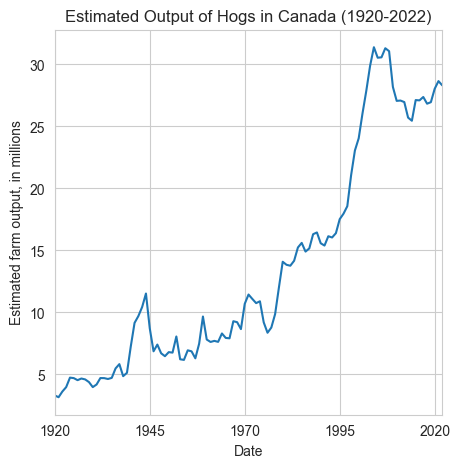

In [11]:
# looks like we have 103 observations...

# Now let's graph the time series
ser_hog_production = pd.Series(data=production_df["VALUE"].values, index=production_df["REF_DATE"], name="production")

# the scale of the data is in thousands. Let's convert to millions
ser_hog_production = ser_hog_production * 1e3 / 1e6

plt.figure(figsize=(5, 5))
# chicken count
plt.subplot(1, 1, 1)
labels = dict(
    xlabel="Date",
    ylabel="Estimated farm output, in millions",
    title=f"Estimated Output of Hogs in Canada ({ser_hog_production.index.min().year}-{ser_hog_production.index.max().year})"
)
ser_hog_production.plot(**labels)


Now that we have a time series for prices and production, let's merge them into a single dataframe.


In [12]:
final_df = pd.DataFrame(data={"prices": ser_hog_prices}).join(ser_hog_production)
final_df['Eins'] = np.ones((len(final_df),))
final_df = final_df.dropna()
final_df

,prices,production,Eins
YEAR,,,
1985-01-01,68.311574,15.6044,1.0
1986-01-01,82.591111,14.9009,1.0
1987-01-01,80.168519,15.1622,1.0
1988-01-01,62.414537,16.3037,1.0
1989-01-01,62.787037,16.4450,1.0
1990-01-01,75.100278,15.5740,1.0
1991-01-01,67.486111,15.3878,1.0
1992-01-01,61.614352,16.1390,1.0
1993-01-01,71.952778,16.0400,1.0



### unlike the previous dataset, there was more overlap between the two time series

We have 38 rows of data that can be used in the analysis


Text(0.5, 28.999999999999986, 'Dollars per hundredweight')

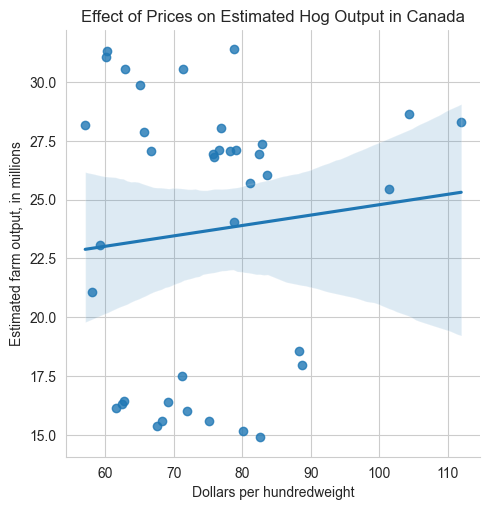

In [15]:

# let's use a linear regression to explore the relationship between prices and production

# a scatter plot and the OLS regression line plotted
sns.lmplot(data=final_df, x="prices", y="production")
plt.title("Effect of Prices on Estimated Hog Output in Canada")
plt.ylabel("Estimated farm output, in millions")
plt.xlabel("Dollars per hundredweight")

In [14]:
# finally let's look at the results from the regression

Y = final_df["production"]
X = final_df[['prices', 'Eins']]
results = sm.OLS(Y, X).fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             production   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.3441
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.561
Time:                        11:23:32   Log-Likelihood:                -119.97
No. Observations:                  38   AIC:                             243.9
Df Residuals:                      36   BIC:                             247.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
prices         0.0441      0.075      0.587      0.561      -0.108       0.197
Eins          20.3703      5.706      3.570      0.001       8.797      31.944
==============================================================================
Omnibus:                       17.980   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.700
Skew:                          -0.294   Prob(JB):                        0.157
Kurtosis:                       1.589   Cond. No.                         457.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### linear regression results:

The F-staticic for this model was `0.3441` and the chances of observing this statistic under a normal distribution is approximately 56%. Therefore, with a p-value set to 0.05, we are not in a position to reject the null hypothesis. 

